# Explore WordNet and SentiWordnet structure
- Miller, G. A. (1995). WordNet: a lexical database for English. Communications of the ACM, 38(11), 39-41.
- Baccianella, S., Esuli, A., & Sebastiani, F. (2010, May). Sentiwordnet 3.0: an enhanced lexical resource for sentiment analysis and opinion mining. In Lrec (Vol. 10, No. 2010, pp. 2200-2204).

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
from nltk.corpus import wordnet as wn

In [3]:
from IPython.display import Image, display

## WordNet

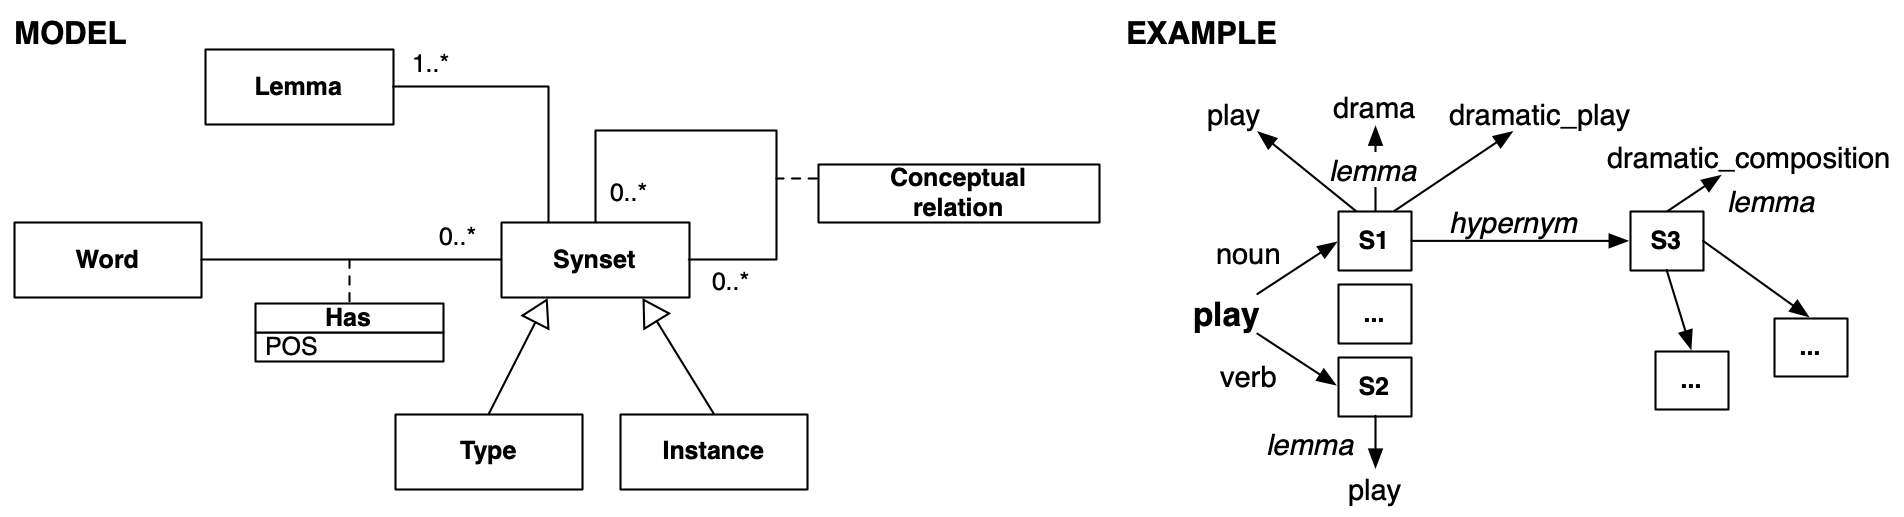

In [4]:
display(Image(filename='imgs/wordnet.png'))

In [5]:
word = 'studying'
synsets = wn.synsets(word)
synsets[:3]

[Synset('perusal.n.01'), Synset('analyze.v.01'), Synset('study.v.02')]

### Part of speech

In [6]:
synsets = wn.synsets(word, pos=wn.VERB)
synsets[:3]

[Synset('analyze.v.01'), Synset('study.v.02'), Synset('study.v.03')]

### Anatomy of a synset

In [7]:
s = synsets[1]
display(s.definition())

'be a student; follow a course of study; be enrolled at an institute of learning'

In [8]:
display(s.examples())

[]

In [9]:
display(wn.synset('code.n.03').topic_domains())
display(wn.synset('pukka.a.01').region_domains())
display(wn.synset('freaky.a.01').usage_domains())

[Synset('computer_science.n.01')]

[Synset('india.n.01')]

[Synset('slang.n.02')]

In [10]:
display(s.lemmas())

[Lemma('study.v.02.study')]

In [11]:
l = s.lemmas()[0]
l.name()

'study'

### Multilingual

In [12]:
ita = s.lemmas(lang='ita')
display(ita)

[Lemma('study.v.02.studiare')]

In [13]:
ita[0].synset()

Synset('study.v.02')

### Synset relations and lemma relations

In [14]:
z = wn.synsets('text', pos=wn.NOUN)[0]
z.definition()

'the words of something written'

In [15]:
display(z.hypernyms()[:3])
display(z.hyponyms()[:3])
display(z.member_holonyms()[:3])
display(z.lowest_common_hypernyms(wn.synset('word.n.01')))

[Synset('matter.n.06')]

[Synset('column.n.08'), Synset('cookie.n.03'), Synset('copy.n.03')]

[]

[Synset('abstraction.n.06')]

Antonyms, derivationally_related_forms and pertainyms are defined over lemmas

In [16]:
g = wn.synsets('good', pos=wn.ADJ)[0]
display(g.definition())

'having desirable or positive qualities especially those suitable for a thing specified'

In [17]:
display(g.lemmas()[0].antonyms())
display(g.lemmas()[0].derivationally_related_forms())
display(g.lemmas()[0].pertainyms())

[Lemma('bad.a.01.bad')]

[Lemma('good.n.03.goodness')]

[]

### Verb frames

In [18]:
v = wn.synsets('bring', pos=wn.VERB)[0]
display(v.definition())
display(v.frame_ids(), v.lemmas()[0].frame_strings())

'take something or somebody with oneself somewhere'

[8, 9, 10, 11, 20, 21]

['Somebody bring something',
 'Somebody bring somebody',
 'Something bring somebody',
 'Something bring something',
 'Somebody bring somebody PP',
 'Somebody bring something PP']

### Similarity

In [19]:
a = wn.synset('king.n.01')
b = wn.synset('queen.n.01')
display(a.path_similarity(b))
display(a.lch_similarity(b))
display(a.wup_similarity(b))

0.1

1.3350010667323402

0.5714285714285714

### Word lookup

In [20]:
display(wn.synsets('dogs', pos=wn.NOUN))
display(wn.morphy('dogs'))
display(wn.synsets(wn.morphy('dogs'), pos=wn.NOUN))

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01')]

'dog'

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01')]

### Synset closure

In [21]:
h = lambda s: s.hypernyms()
b = wn.synsets('book', wn.NOUN)[0]
for j in b.closure(h):
    print(j)

Synset('publication.n.01')
Synset('work.n.02')
Synset('product.n.02')
Synset('creation.n.02')
Synset('artifact.n.01')
Synset('whole.n.02')
Synset('object.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


## SentiWordnet

In [22]:
from nltk.corpus import sentiwordnet as swn

In [23]:
for s in wn.synsets('tackle'):
    print(s.name(), s.definition())

tackle.n.01 the person who plays that position on a football team
rigging.n.01 gear consisting of ropes etc. supporting a ship's masts and sails
fishing_gear.n.01 gear used in fishing
tackle.n.04 (American football) a position on the line of scrimmage
tackle.n.05 (American football) grasping an opposing player with the intention of stopping by throwing to the ground
undertake.v.02 accept as a challenge
harness.v.01 put a harness
tackle.v.03 seize and throw down an opponent player, who usually carries the ball


In [24]:
syn1 = swn.senti_synset(wn.synsets('publication', pos=wn.NOUN)[0].name())
syn2 = swn.senti_synset('harness.v.01')

In [25]:
print(syn1.pos_score(), syn1.neg_score(), syn1.obj_score())
print(syn2.pos_score(), syn2.neg_score(), syn2.obj_score())

0.0 0.0 1.0
0.0 0.0 1.0


### The problem of word sense disambiguation

In [55]:
good = wn.synsets('good', pos=wn.ADJ)
data = []
for s in good:
    sw = swn.senti_synset(s.name())
    data.append({
        'synset': s.name(), 'definition': s.definition(), 
        'pos': sw.pos_score(), 'neg': sw.neg_score(), 'obj': sw.obj_score()
    })
D = pd.DataFrame(data)

In [57]:
D

synset                                         definition    pos  \
0         good.a.01  having desirable or positive qualities especia...  0.750   
1         full.s.06                having the normally expected amount  0.000   
2         good.a.03                                  morally admirable  1.000   
3    estimable.s.02                    deserving of esteem and respect  1.000   
4   beneficial.s.01                  promoting or enhancing well-being  0.625   
5         good.s.06                              agreeable or pleasing  1.000   
6         good.s.07                                of moral excellence  0.750   
7        adept.s.01  having or showing knowledge and skill and apti...  0.625   
8         good.s.09                                           thorough  0.625   
9         dear.s.02        with or in a close or intimate relationship  0.500   
10  dependable.s.04                                  financially sound  0.500   
11        good.s.12    most suitable or right for a particular purpose  0.375   
12        good.s.13                                resulting favorably  0.625   
13   effective.s.04                        exerting force or influence  0.000   
14        good.s.15                                capable of pleasing  0.625   
15        good.s.16                              appealing to the mind  0.750   
16        good.s.17                    in excellent physical condition  0.750   
17        good.s.18  tending to promote physical well-being; benefi...  0.875   
18        good.s.19                                         not forged  0.500   
19        good.s.20                                  not left to spoil  0.375   
20        good.s.21                                  generally admired  0.750   

      neg    obj  
0   0.000  0.250  
1   0.000  1.000  
2   0.000  0.000  
3   0.000  0.000  
4   0.000  0.375  
5   0.000  0.000  
6   0.000  0.250  
7   0.000  0.375  
8   0.000  0.375  
9   0.000  0.500  
10  0.000  0.500  
11  0.000  0.625  
12  0.000  0.375  
13  0.000  1.000  
14  0.000  0.375  
15  0.000  0.250  
16  0.000  0.250  
17  0.000  0.125  
18  0.000  0.500  
19  0.125  0.500  
20  0.000  0.250

In [58]:
D.describe().T

count      mean       std  min   25%    50%   75%    max
pos   21.0  0.619048  0.275216  0.0  0.50  0.625  0.75  1.000
neg   21.0  0.005952  0.027277  0.0  0.00  0.000  0.00  0.125
obj   21.0  0.375000  0.270994  0.0  0.25  0.375  0.50  1.000